In [669]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [670]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [671]:
df = pd.read_csv("./train.csv")
X_test = pd.read_csv("./test.csv")

In [672]:
X_train = df.iloc[ : , 1 : 57]
X_train = X_train.astype(float)

In [673]:
y_train = df.iloc[:, 57:]

In [674]:
X_test = X_test.iloc[ : , 1 : ]

In [675]:
train_df = X_train[['X_49', 'X_07', 'X_03', 'X_09', 'X_52', 'X_50', 'X_13', 'X_27', 'X_46']]
X_test = X_test[['X_49', 'X_07', 'X_03', 'X_09', 'X_52', 'X_50', 'X_13', 'X_27', 'X_46']]

In [676]:
from sklearn.model_selection import train_test_split
#X_tr, X_val, y_tr, y_val = train_test_split(train_df, y_train, test_size = 0.2)
X_tr, X_val, y_tr, y_val = train_test_split(train_df, y_train, test_size = 0.2, random_state = 42)

In [677]:
import xgboost as xgb
from xgboost import plot_importance

d_tr = xgb.DMatrix(data = X_tr, label = y_tr)
d_val = xgb.DMatrix(data = X_val, label = y_val)
d_test = xgb.DMatrix(data = X_test)

In [678]:
params = {'max_depth' : 3,
          'eta' : 0.2,
          'objective' : 'reg:linear'}

modelXGB = xgb.train(params = params, dtrain = d_tr, num_boost_round = 150, evals = [(d_tr, 'train'), (d_val, 'eval')])
predXGB = modelXGB.predict(d_val)

[15:39:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:16.68957	eval-rmse:16.68691
[1]	train-rmse:13.37221	eval-rmse:13.36926
[2]	train-rmse:10.72327	eval-rmse:10.72011
[3]	train-rmse:8.61018	eval-rmse:8.60664
[4]	train-rmse:6.92726	eval-rmse:6.92336
[5]	train-rmse:5.59005	eval-rmse:5.58566
[6]	train-rmse:4.53137	eval-rmse:4.52638
[7]	train-rmse:3.69792	eval-rmse:3.69201
[8]	train-rmse:3.04674	eval-rmse:3.03994
[9]	train-rmse:2.54310	eval-rmse:2.53633
[10]	train-rmse:2.16035	eval-rmse:2.15280
[11]	train-rmse:1.87419	eval-rmse:1.86617
[12]	train-rmse:1.66526	eval-rmse:1.65671
[13]	train-rmse:1.51618	eval-rmse:1.50749
[14]	train-rmse:1.41116	eval-rmse:1.40373
[15]	train-rmse:1.33999	eval-rmse:1.33258
[16]	train-rmse:1.29170	eval-rmse:1.28506
[17]	train-rmse:1.25988	eval-rmse:1.25349
[18]	train-rmse:1.23847	eval-rmse:1.23240

In [679]:
rmseXGB = mean_squared_error(y_val, predXGB, squared = False)
nrmseXGB = rmseXGB/np.mean(np.abs(y_val))
scoreXGB = 1.2 * np.sum(nrmseXGB[:8]) + 1.0 * np.sum(nrmseXGB[8:15])

/Users/kim-yeong-u/miniforge3/envs/ywkim/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [680]:
print(scoreXGB)

3.7837948321581383


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

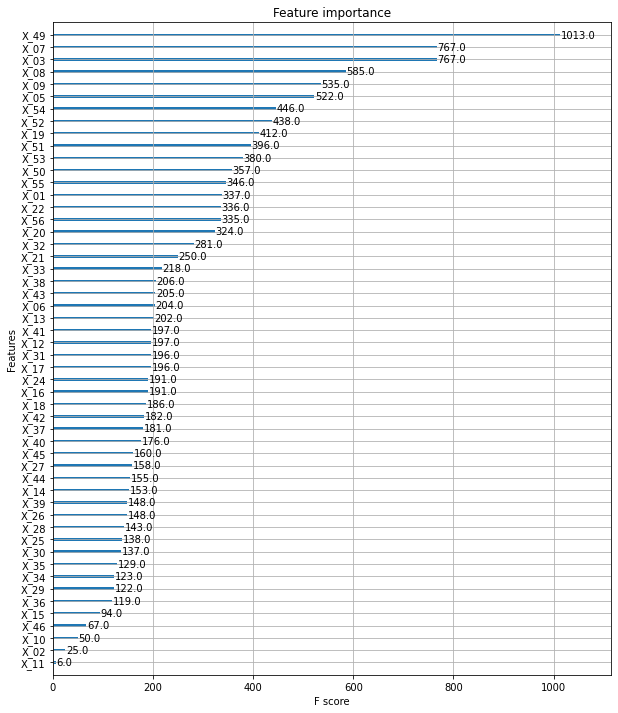

In [681]:
from xgboost import plot_importance
%matplotlib inline

fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(modelXGB, ax = ax)

In [146]:
imp_vals = modelXGB.get_score()
sort_vals = sorted(imp_vals.items(), key = lambda x: x[1], reverse = True)
list_keys = list(dict(sort_vals).keys())
list_keys

['X_49',
 'X_07',
 'X_03',
 'X_08',
 'X_09',
 'X_05',
 'X_54',
 'X_53',
 'X_51',
 'X_52',
 'X_56',
 'X_55',
 'X_19',
 'X_50',
 'X_22',
 'X_01',
 'X_20',
 'X_21',
 'X_38',
 'X_24',
 'X_33',
 'X_16',
 'X_40',
 'X_42',
 'X_43',
 'X_17',
 'X_41',
 'X_39',
 'X_31',
 'X_45',
 'X_06',
 'X_14',
 'X_12',
 'X_26',
 'X_18',
 'X_28',
 'X_13',
 'X_27',
 'X_32',
 'X_34',
 'X_44',
 'X_35',
 'X_37',
 'X_36',
 'X_15',
 'X_30',
 'X_25',
 'X_29',
 'X_46',
 'X_02',
 'X_11',
 'X_10']

In [28]:
preds = modelXGB.predict(d_test)

In [29]:
submit = pd.read_csv('./sample_submission.csv')

In [30]:
for idx, col in enumerate(submit.columns):
    if col=='ID':
        continue
    submit[col] = preds[:,idx-1]
print('Done.')

Done.


In [31]:
submit.to_csv('./submit.csv', index=False)